In [2]:
# Imports
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

plt.rcParams['figure.figsize'] = (15.0, 8.0) # set default size of plots
plt.rcParams['figure.facecolor'] = 'white'

matplotlib.rcParams.update({'font.size': 15})

In [3]:
TIME_RETRIEVAL_REE = 0
TIME_RETRIEVAL_TEE = 10
TIME_RETRIEVAL_REE_WASM = 0
TIME_RETRIEVAL_TEE_WASM = 13

In [4]:
def compute_mean_std(name, time):
    df = pd.DataFrame(columns = ["Name","Time"])
    df["Name"] = pd.to_numeric(name)
    df["Time"] = time
    
    result = pd.DataFrame(columns = ["Mean","Std"])
    result["Mean"] = df.groupby("Name")["Time"].median() #df.groupby("Size")["Time"].apply(stats.gmean)
    result["Std"] = df.groupby("Name")["Time"].std() #df.groupby("Size")["Time"].apply(stats.gstd)
    
    return result

def formatForLatex(n, digits_round = 3):
    roundedAsString = str(round(n, digits_round))
    if "." in roundedAsString:
        roundedAsString = roundedAsString.rstrip("0")
        roundedAsString = roundedAsString.rstrip(".")
    return f"{roundedAsString}"

In [5]:
#
## TEE (Wasm) dataset
#

In [6]:
# Import the dataset
tee_wasm_raw = pd.read_csv("../logs/speedtest1/tee-wasm.csv", names = ["Name","Time"])
tee_wasm_raw["Name"] = tee_wasm_raw["Name"]

tee_wasm_raw

,Name,Time
0,100,50042
1,110,77080
2,120,104022
3,130,70165
4,140,129558
...,...,...
1545,500,129371
1546,510,120664
1547,520,78261
1548,980,288656


In [7]:
# Adapt the time according the retrieval of the time
tee_wasm = tee_wasm_raw

tee_wasm["Time"] = tee_wasm["Time"] - 2*TIME_RETRIEVAL_TEE_WASM/2

# Drop any error in the logs
# tee_wasm.drop(tee_wasm[tee_wasm.Name.str.contains("failed")].index, inplace = True)
tee_wasm = tee_wasm.reset_index()

tee_wasm

,index,Name,Time
0,0,100,50029.0
1,1,110,77067.0
2,2,120,104009.0
3,3,130,70152.0
4,4,140,129545.0
...,...,...,...
1545,1545,500,129358.0
1546,1546,510,120651.0
1547,1547,520,78248.0
1548,1548,980,288643.0


In [8]:
#
## TEE (Native) dataset
#

In [9]:
# Import the dataset
tee_native_raw = pd.read_csv("../logs/speedtest1/tee-native.csv", names = ["Name","Time"])
tee_native_raw["Name"] = tee_native_raw["Name"]

# Trim to results to match TEE logs, which may have been trimmed because of errors
tee_native_raw.drop(tee_native_raw.index[len(tee_wasm.index):], inplace = True)

tee_native_raw

,Name,Time
0,100,32626
1,110,51307
2,120,72828
3,130,40361
4,140,99412
...,...,...
1545,500,102515
1546,510,82020
1547,520,60449
1548,980,222175


In [10]:
# Adapt the time according the retrieval of the time
tee_native = tee_native_raw

tee_native["Time"] = tee_native["Time"] - 2*TIME_RETRIEVAL_TEE/2

tee_native

,Name,Time
0,100,32616.0
1,110,51297.0
2,120,72818.0
3,130,40351.0
4,140,99402.0
...,...,...
1545,500,102505.0
1546,510,82010.0
1547,520,60439.0
1548,980,222165.0


In [11]:
#
## REE (Native) dataset
#

In [12]:
# Import the dataset
ree_native_raw = pd.read_csv("../logs/speedtest1/ree-native.csv", names = ["Name","Time"])
ree_native_raw["Name"] = ree_native_raw["Name"]

# Trim to results to match TEE logs, which may have been trimmed because of errors
ree_native_raw.drop(ree_native_raw.index[len(tee_wasm.index):], inplace = True)

ree_native_raw

,Name,Time
0,100,26750
1,110,39056
2,120,50024
3,130,37901
4,140,77563
...,...,...
1545,500,63552
1546,510,59672
1547,520,32160
1548,980,178600


In [13]:
# Adapt the time according the retrieval of the time
ree_native = ree_native_raw

ree_native["Time"] = ree_native["Time"] - 2*TIME_RETRIEVAL_REE/2

ree_native

,Name,Time
0,100,26750.0
1,110,39056.0
2,120,50024.0
3,130,37901.0
4,140,77563.0
...,...,...
1545,500,63552.0
1546,510,59672.0
1547,520,32160.0
1548,980,178600.0


In [14]:
#
## REE (Wasm) dataset
#

In [15]:
# Import the dataset
ree_wasm_raw = pd.read_csv("../logs/speedtest1/ree-wasm.csv", names = ["Name","Time"])
ree_wasm_raw["Name"] = ree_wasm_raw["Name"]

# Trim to results to match TEE logs, which may have been trimmed because of errors
ree_wasm_raw.drop(ree_wasm_raw.index[len(tee_wasm.index):], inplace = True)

ree_wasm_raw

,Name,Time
0,100,50091
1,110,75438
2,120,104286
3,130,70685
4,140,131082
...,...,...
1545,500,129629
1546,510,121589
1547,520,78774
1548,980,290217


In [16]:
# Adapt the time according the retrieval of the time
ree_wasm = ree_wasm_raw

ree_wasm["Time"] = ree_wasm["Time"] - 2*TIME_RETRIEVAL_REE_WASM/2

ree_wasm

,Name,Time
0,100,50091.0
1,110,75438.0
2,120,104286.0
3,130,70685.0
4,140,131082.0
...,...,...
1545,500,129629.0
1546,510,121589.0
1547,520,78774.0
1548,980,290217.0


In [17]:
#
## Export
#

In [18]:
# Normalize the results based on REE time
ree_native_normalized = pd.DataFrame()
ree_wasm_normalized = pd.DataFrame()
tee_native_normalized = pd.DataFrame()
tee_wasm_normalized = pd.DataFrame()
for col in ree_native:
    if col == "Name":
        tee_wasm_normalized[col] = tee_wasm[col]
        ree_wasm_normalized[col] = ree_wasm[col]
        tee_native_normalized[col] = tee_native[col]
        ree_native_normalized[col] = ree_native[col]
    else:
        tee_wasm_normalized[col] = tee_wasm[col] / ree_native[col]
        ree_wasm_normalized[col] = ree_wasm[col] / ree_native[col]
        tee_native_normalized[col] = tee_native[col] / ree_native[col]
        ree_native_normalized[col] = 1
    
tee_wasm_normalized

,Name,Time
0,100,1.870243
1,110,1.973244
2,120,2.079182
3,130,1.850927
4,140,1.670191
...,...,...
1545,500,2.035467
1546,510,2.021903
1547,520,2.433085
1548,980,1.616142


In [19]:
# Compute the mean and std
ree_native_export = pd.DataFrame()

ree_native_export = pd.concat([ree_native_export, compute_mean_std(ree_native_normalized["Name"], ree_native_normalized["Time"])])
ree_native_export

,Mean,Std
Name,,
100,1.0,0.0
110,1.0,0.0
120,1.0,0.0
130,1.0,0.0
140,1.0,0.0
142,1.0,0.0
145,1.0,0.0
150,1.0,0.0
160,1.0,0.0


In [20]:
# Compute the mean and std
ree_wasm_export = pd.DataFrame()

ree_wasm_export = pd.concat([ree_wasm_export, compute_mean_std(ree_wasm_normalized["Name"], ree_wasm_normalized["Time"])])
ree_wasm_export

,Mean,Std
Name,,
100,1.852969,0.074318
110,1.929790,0.020044
120,2.065539,0.017539
130,1.860041,0.007885
140,1.663221,0.016099
142,1.678073,0.011631
145,1.539461,0.015287
150,1.751907,0.012847
160,1.643960,0.012199


In [21]:
# Compute the mean and std
tee_wasm_export = pd.DataFrame()

tee_wasm_export = pd.concat([tee_wasm_export, compute_mean_std(tee_wasm_normalized["Name"], tee_wasm_normalized["Time"])])
tee_wasm_export

,Mean,Std
Name,,
100,1.831035,0.303489
110,1.946496,0.029013
120,2.077081,0.029641
130,1.851531,0.010074
140,1.659485,0.014359
142,1.693865,0.011284
145,1.534578,0.015271
150,1.760497,0.013568
160,1.649711,0.013577


In [22]:
# Compute the mean and std
tee_native_export = pd.DataFrame()

tee_native_export = pd.concat([tee_native_export, compute_mean_std(tee_native_normalized["Name"], tee_native_normalized["Time"])])
tee_native_export

,Mean,Std
Name,,
100,1.240051,0.168312
110,1.334708,0.034996
120,1.486568,0.031725
130,1.061968,0.289919
140,1.266386,0.012233
142,1.220349,0.233476
145,1.120945,0.364315
150,1.542829,0.294255
160,0.972193,0.192425


In [23]:
#
## Temp visualisation
#

(0.9, 2.5820423788342346)

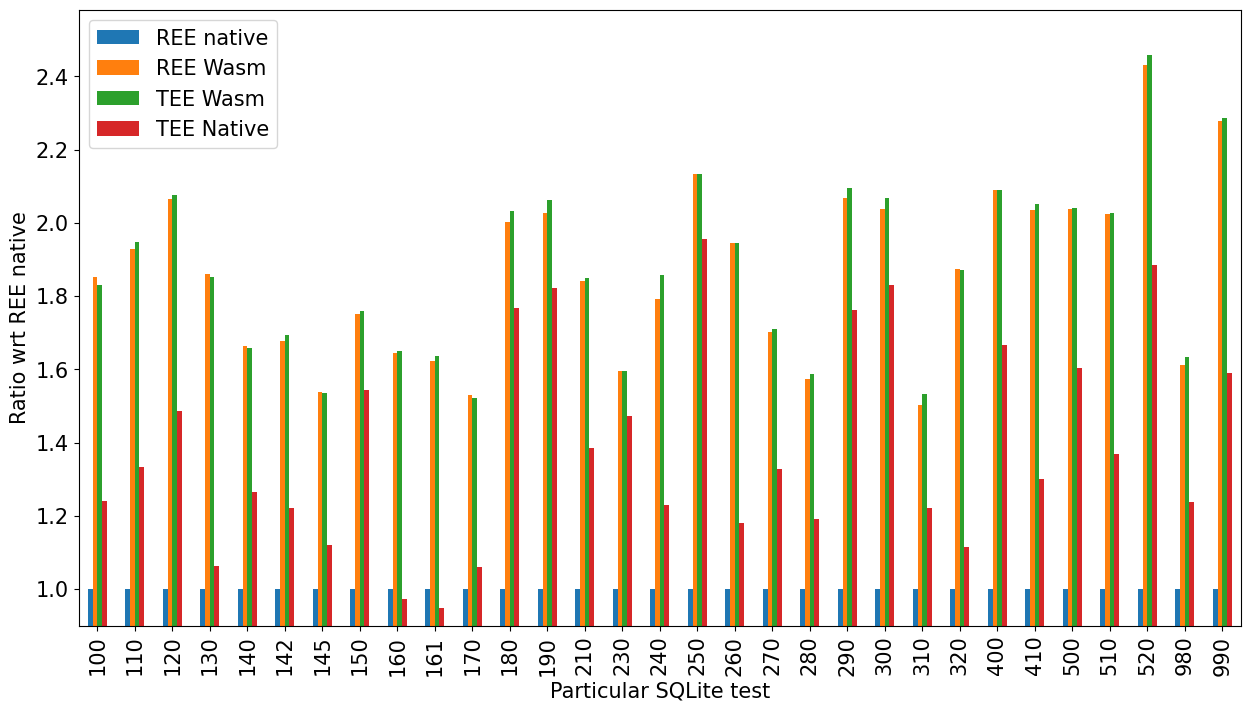

In [31]:
df = pd.DataFrame({'REE native': ree_native_export["Mean"],
                   'REE Wasm': ree_wasm_export["Mean"],
                   'TEE Wasm': tee_wasm_export["Mean"],
                   'TEE Native': tee_native_export["Mean"]}, index=ree_native_export.index.values)
ax = df.plot.bar()
ax.set_xlabel("Particular SQLite test")
ax.set_ylabel("Ratio wrt REE native")
ax.set_ylim(0.9)

In [ ]:
# Retrieve the name of the experiment, order by TEE normalized run time
tee_wasm_indexes = tee_wasm_export.sort_values(by=["Mean"]).index
tee_wasm_indexes

Index([170, 310, 145, 280, 230, 980, 161, 160, 140, 142, 270, 150, 100, 210,
       130, 240, 320, 260, 110, 510, 180, 500, 410, 190, 300, 120, 400, 290,
       250, 990, 520],
      dtype='int64', name='Name')

In [ ]:
# Order the entries based on the TEE normalized run time
ree_wasm_export = ree_wasm_export.reindex(tee_wasm_indexes)
tee_wasm_export = tee_wasm_export.reindex(tee_wasm_indexes)
tee_native_export = tee_native_export.reindex(tee_wasm_indexes)

In [ ]:
# Compute values for the paper

def get_mean_of_experiment(name):
    return tee_wasm_export.loc[tee_wasm_export.index == name]["Mean"].values[0]

tee_wasm_mean_of_mean = tee_wasm_export["Mean"].mean()
ree_wasm_mean_of_mean = ree_wasm_export["Mean"].mean()
tee_native_mean_of_mean = tee_native_export["Mean"].mean()
tee_wasm_and_tee_native_ratio = tee_wasm_mean_of_mean / tee_native_mean_of_mean

tee_wasm_insert_mean = pd.DataFrame(
[
    get_mean_of_experiment(100),
    get_mean_of_experiment(110),
    get_mean_of_experiment(120),
    get_mean_of_experiment(180),
    get_mean_of_experiment(190),
    get_mean_of_experiment(210),
    get_mean_of_experiment(290),
    get_mean_of_experiment(300),
    get_mean_of_experiment(400),
    get_mean_of_experiment(500)
]).mean()

tee_wasm_index_mean = pd.DataFrame(
[
    get_mean_of_experiment(110),
    get_mean_of_experiment(120),
    get_mean_of_experiment(160),
    get_mean_of_experiment(161),
    get_mean_of_experiment(170),
    get_mean_of_experiment(180),
    get_mean_of_experiment(230),
    get_mean_of_experiment(270),
    get_mean_of_experiment(400),
    get_mean_of_experiment(410),
    get_mean_of_experiment(500),
    get_mean_of_experiment(510)
]).mean()

tee_wasm_select_mean = pd.DataFrame(
[
    get_mean_of_experiment(130),
    get_mean_of_experiment(140),
    get_mean_of_experiment(142),
    get_mean_of_experiment(145),
    get_mean_of_experiment(160),
    get_mean_of_experiment(161),
    get_mean_of_experiment(170),
    get_mean_of_experiment(260),
    get_mean_of_experiment(310),
    get_mean_of_experiment(320),
    get_mean_of_experiment(410),
    get_mean_of_experiment(510),
    get_mean_of_experiment(520)
]).mean()
tee_wasm_select_mean.values[0]

np.float64(1.8027197505966395)

In [ ]:
ree_wasm_mean_of_mean

np.float64(1.8626940034177581)

In [ ]:
tee_wasm_mean_of_mean

np.float64(1.8737326529507738)

In [ ]:
tee_native_mean_of_mean

np.float64(1.3924495223448181)

In [ ]:
tee_wasm_insert_mean

0    2.008738
dtype: float64

In [ ]:
tee_wasm_select_mean

0    1.80272
dtype: float64

In [ ]:
tee_wasm_and_tee_native_ratio

np.float64(1.3456377576944392)

In [ ]:
# Export CSV
#
# File format: experiment_name, mean, stddev

ree_wasm_export.to_csv('../logs/speedtest1/ree_wasm_formatted.csv', float_format='%.2f')
tee_wasm_export.to_csv('../logs/speedtest1/tee_wasm_formatted.csv', float_format='%.2f')
tee_native_export.to_csv('../logs/speedtest1/tee_native_formatted.csv', float_format='%.2f')

In [ ]:
# Export LaTeX

prefix = "SpeedtestOne"

def write(file, column_name, number, digits_round = 3):
    f.write(f"\\def\\bm{prefix}{column_name}{{{formatForLatex(number, digits_round)}}}\n")

f = open('export.tex', "w")
write(f, "GlobalSlowdownTeeWasm", tee_wasm_mean_of_mean, 2)
write(f, "GlobalSlowdownTeeNative", tee_native_mean_of_mean, 2)
write(f, "GlobalSlowdownReeWasm", ree_wasm_mean_of_mean, 2)
write(f, "GlobalRatioTeeWasmAndTeeNative", tee_wasm_and_tee_native_ratio, 2)
write(f, "InsertAverage", tee_wasm_insert_mean.values[0], 2)
write(f, "IndexAverage", tee_wasm_index_mean.values[0], 2)
write(f, "SelectAverage", tee_wasm_select_mean.values[0], 2)
write(f, "GlobalSlowdownPercent", (tee_wasm_mean_of_mean - 1) * 100, 1)
write(f, "InsertAveragePercent", (tee_wasm_insert_mean.values[0] - 1) * 100, 1)
write(f, "IndexAveragePercent", (tee_wasm_index_mean.values[0] - 1) * 100, 1)
write(f, "SelectAveragePercent", (tee_wasm_select_mean.values[0] - 1) * 100, 1)
f.close()